In [3]:
#1. 환경 준비
from tensorflow.keras.models import Sequential  
# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       
# 데이터를 다루는데 필요한 라이브러리를 불러옵니다.
import numpy as np

In [7]:
# 2. 데이터 준비
Data_set = np.loadtxt(
"https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/ThoraricSurgery3.csv"
, delimiter=",") 
# 준비된 수술 환자 데이터를 불러옵니다.
X = Data_set[:,0:16]                                                 
# 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]
# 수술 후 사망/생존 여부를 y로 지정합니다. 0 / 1

array([[ 1.  ,  2.88,  2.16, ...,  0.  , 60.  ,  0.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  0.  , 51.  ,  0.  ],
       [ 2.  ,  2.76,  2.08, ...,  0.  , 59.  ,  0.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  , 52.  ,  0.  ],
       [ 2.  ,  1.96,  1.68, ...,  0.  , 79.  ,  0.  ],
       [ 2.  ,  4.72,  3.56, ...,  0.  , 51.  ,  0.  ]])

In [9]:
# 3. 구조 결정
model = Sequential()                                                  
# 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# 모델 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
# 딥러닝 모델을 실행합니다.
history=model.fit(X, y, epochs=5, batch_size=16)


Epoch 1/5


30/30 [==============================] - 1s 1ms/step - loss: 3.3300 - accuracy: 0.2681 
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4934 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8511


@ 딥러닝을 위한 기초 수학
<br />- ‘딥러닝을 배운다’는 말에는 딥러닝의 실행법을 익히는 것뿐 아니라, 딥러닝의 수학 원리를 공부한다는 의미도 담겨 있음
<br />- 원리를 알아야 정확히 실행할 수 있기 때문에 딥러닝의 원리를 이해하는 것은 좋은 코드를 만드는 것 이상으로 중요함
<br />- 딥러닝의 수학 원리를 이해하기 위해서는 당연히 기본적인 수학 지식이 필요함
<br />- 어떤 원리로 입력 값의 패턴을 분석하고 학습하는지 이해하려면 그 배경이 되는 수학 연산을 살펴보아야 하고, 여기에 사용되는 함수들을 알아야 하기 때문임
<br />- 좋은 소식은 딥러닝 뒤에 있는 수학적 배경이 다른 머신 러닝과 비교했을 때 그다지 어렵지 않다는 것
<br />- 딥러닝은 고등학교 수준의 수학만으로도 원리와 배경을 파악할 수 있음
<br />- 조금 더 깊이 공부하더라도 대학교 교양 강좌 수준을 넘지 않는 범위에서 딥러닝의 원리를 이해할 수 있음

@ 일차 함수, 기울기와 y 절편
<br />- 함수란 두 집합 사이의 관계를 설명하는 수학 개념
<br />- 변수 x와 y가 있을 때, x가 변하면 이에 따라 y는 어떤 규칙으로 변하는지 나타냄
<br />- 보통 함수를 나타낼 때는 function의 f와 변수 x를 사용해 y =f(x)라고 표시
<br />- 일차 함수는 y가 x에 관한 일차식으로 표현된 경우를 의미
<br />- 예를 들어 다음과 같은 함수식으로 나타낼 수 있음
  y = ax + b (a!=0)
<br />- x가 일차인 형태이며 x가 일차로 남으려면 a는 0이 아니어야 함
<br />- 일차 함수식 y = ax + b에서 a는 기울기, b는 절편이라고 함
<br />- 기울기는 기울어진 정도를 의미하는데, 그림 3-1에서 x 값이 증가할 때 y 값이 어느 정도 증가하는지에 따라 그래프의 기울기 a가 정해짐
절편은 그래프가 축과 만나는 지점을 의미
<br />- x가 주어지고 원하는 y 값이 있을 때 적절한 a와 b를 찾는 것, 이것이 바로 딥러닝을 설명하는 가장 간단한 표현

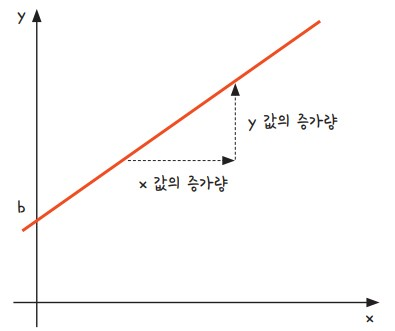

@ 이차 함수와 최솟값
<br />- 이차 함수란 y가 x에 관한 이차식으로 표현되는 경우를 의미
<br />- 다음과 같은 함수식으로 표현할 수 있음
<br />y = ax^2 (a != 0)
<br />- 이차 함수의 그래프는 포물선 모양
<br />- a > 0이면 아래로 볼록한 그래프가 됨
<br />- y = ax^2의 그래프를 x축 방향으로 p만큼, y축 방향으로 q만큼 평행 이동시키면 같이 움직임
<br />- 점 p와 q를 꼭짓점으로 하는 포물선이 됨 y = a(x-p)^2 + q
<br />- 이때 포물선의 맨 아래에 위치한 지점이 최솟값이 되는데, 딥러닝을 실행할 때는 이 최솟값을 찾아내는 과정이 매우 중요함
<br />- ‘최소 제곱법’ 공식으로 쉽게 알아낼 수 있음
<br />- 딥러닝을 실제로 실행할 때 만나는 문제에서는 대부분 최소 제곱법을 활용할 수가 없음
<br />- 그 이유는 최소 제곱법을 계산하기 위해 꼭 필요한 조건들을 알 수 없기 때문임
<br />- 미분과 기울기를 이용해야 함

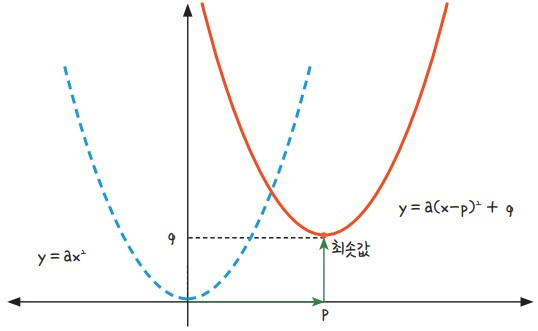

@ 미분, 순간 변화율과 기울기
<br />- 딥러닝을 이해하는 데 가장 중요한 수학 원리는 미분이라고 할 수 있음
<br />- 조금 전 딥러닝은 결국 일차 함수의 a와 b 값을 구하는 것인데, a와 b 값은 이차 함수 포물선의 최솟값을 구하는 것 
<br />- 이 최솟값을 미분으로 구하기 때문에 미분이 딥러닝에서 중요한 것
<br />
<br />* 미분과 기울기의 개념을 먼저 알아보자
<br />- y = x2이라는 그래프가 있다고 해 보자
<br />- x축에 있는 한 점 a에 대응하는 y의 값은 a^2
<br />- 이때 a가 오른쪽이나 왼쪽으로 조금씩 이동한다고 상상해 보자
<br />- 이에 따라 y도 조금씩 변화할 것
<br />- 상상력을 조금 더 발휘해 이번에는 a가 미세하게 ‘0에 가까울 만큼’ 움직였다고 하자
<br />- y 값 역시 매우 미세하게 변화를 할 텐데, 이번에는 너무 미세해서 실제로 움직이는 것이 아니라 방향만 드러내는 정도의 순간적인 변화만 있을 것
<br />- 이 순간의 변화를 놓고 순간 변화율이라는 이름을 붙였음
<br />- 순간 변화율은 어느 쪽을 향하는 방향성을 지니고 있으므로, 이 방향을 따라 직선을 길게 그려 주면 그래프와 맞닿는 접선이 그려짐
<br />- 이 선이 바로 이 점에서의 기울기가 됨

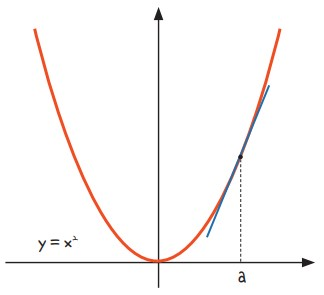

<br />- 미분을 한다는 것은 쉽게 말해 이 ‘순간 변화율’을 구한다는 것
<br />- 어느 순간에 어떤 변화가 일어나고 있는지 숫자로 나타낸 것을 미분 계수라고 하며, 이 미분 계수는 곧 그래프에서의 기울기를 의미
<br />- 이 기울기가 중요한 것은 기울기가 0일 때, 즉 x축과 평행한 직선으로 그어질 때가 바로 그래프에서 최솟값인 지점이 되기 때문임

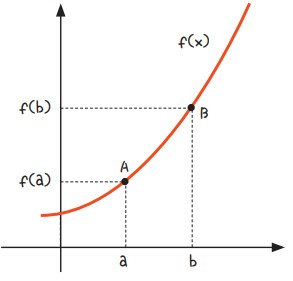

<br />- 이때 두 점 A와 B를 이어 직선을 만들면 그림 3-6과 같이 두 점 A와 B를 지나는 직선의 기울기가 그려짐
<br />- 여기서 Δ(델타)는 변화량을 나타내는 기호

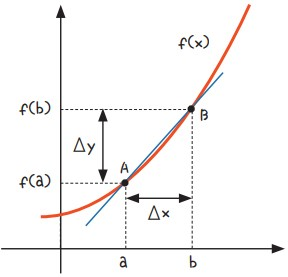

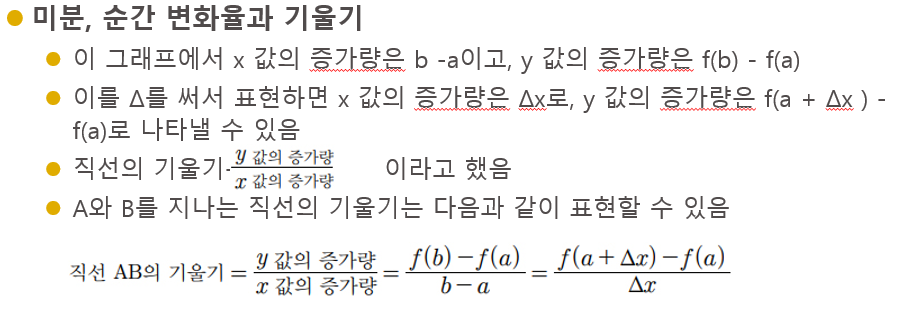

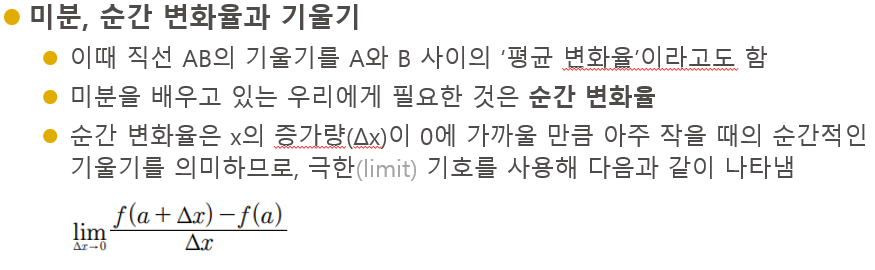

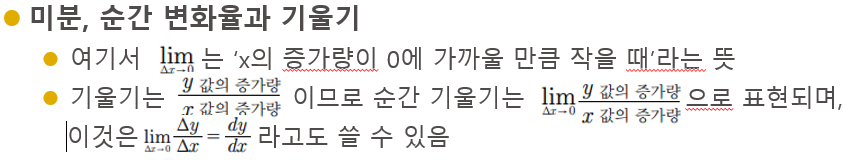

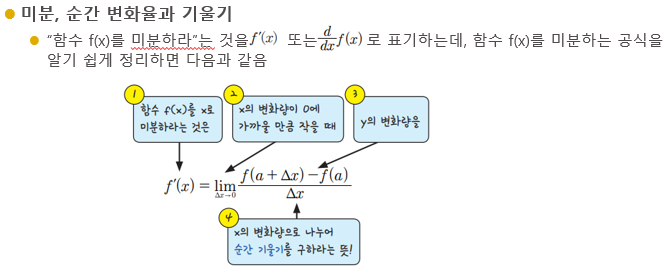

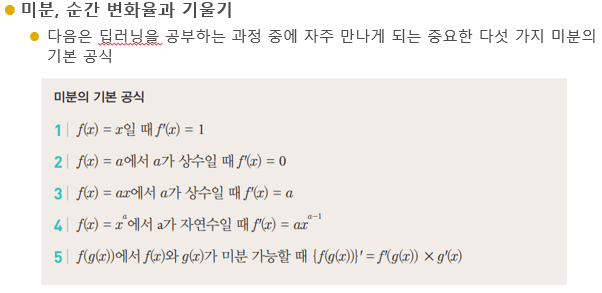

편미분
<br />- 미분과 더불어 딥러닝을 공부할 때 가장 자주 접하게 되는 또 다른 수학 개념은 바로 편미분
미분과 편미분 모두 ‘미분하라’는 의미에서는 다를 바가 없음
<br />- 여러 가지 변수가 식 안에 있을 때, 모든 변수를 미분하는 것이 아니라 우리가 원하는 한 가지 변수만 미분하고 그 외에는 모두 상수로 취급하는 것이 바로 편미분
예를 들어 f(x) = x와 같은 식을 미분할 때는 변수가 x 하나뿐이어서 미분하라는 의미에 혼란이 없음
<br />- f(x, y) = x^2 + yx + a (a는 상수)
<br />- 여기에는 변수가 x와 y, 이렇게 두 개 있음
<br />- 이 중 어떤 변수로 미분해야 하는지 정해야 하므로 편미분을 사용하는 것
<br />- 만일 이 식처럼 여러 변수 중에서 x에 관해서만 미분하고 싶다면, 함수 f를 ‘x에 관해 편미분하라’고 하며 다음과 같이 식을 씀
<br />
<br />- 앞에 나온 함수 f(x, y) = x2 + yx + a를 x에 관해 편미분하는 과정은 어떻게 될까? 
<br />- 먼저 바로 앞에서 배운 미분의 성질 4에 따라 x2항은 2x가 됨
<br />- 미분법의 기본 공식 3에 따라 yx는 y가 됨
<br />- 마지막 항 a는 미분의 성질 1에 따라 0이 됨

지수와 지수 함수
<br />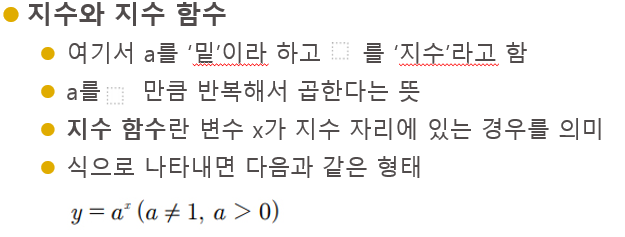

<br />- 지수 함수에서는 밑(a) 값이 무엇인지가 중요함
<br />- 이 값이 1이면 함수가 아님
<br />- 또 0보다 작으면 허수를 포함하게 되므로 안 됨
<br />- 밑의 값은 a > 1이거나 0 < a < 1, 둘 중 하나가 되어야 함
<br />
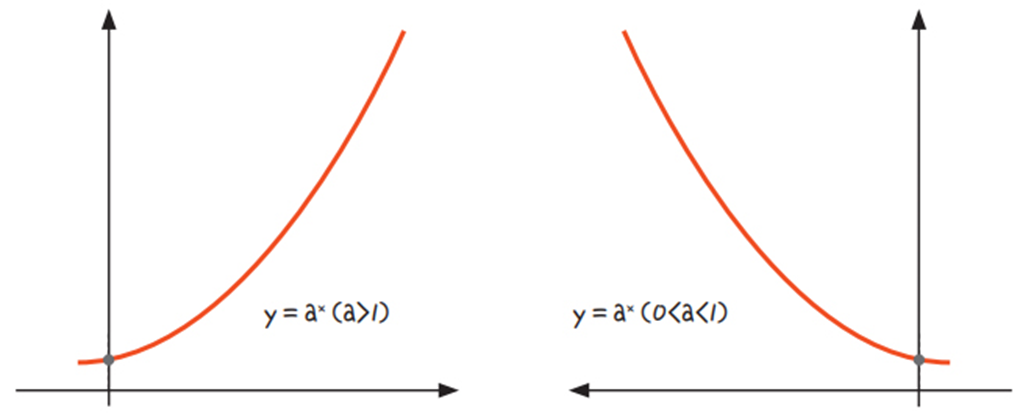

시그모이드 함수
<br />- 딥러닝의 내부를 보면 입력받은 신호를 얼마나 출력할지를 계산하는 과정이 무수히 반복
<br />- 이때 출력 값으로 얼마나 내보낼지를 계산하는 함수를 활성화 함수라고 함
<br />- 활성화 함수는 딥러닝이 발전함에 따라 여러 가지 형태로 개발되어 왔는데, 그중 가장 먼저 배우는 중요한 함수가 바로 시그모이드 함수
<br />- 시그모이드 함수는 지수 함수에서 밑 값이 자연 상수 e인 함수를 의미
<br />- 자연 상수 e는 ‘자연 로그의 밑’, ‘오일러의 수’ 등 여러 이름으로 불리는데, 파이(π)처럼 수학에서 중요하게 사용되는 무리수이며 그 값은 대략 2.718281828…
<br />
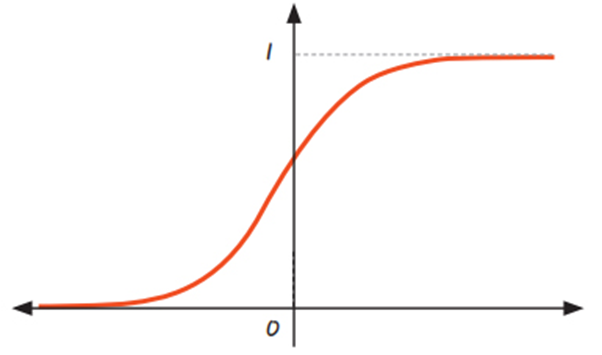

@ 가장 훌륭한 예측선
<br />- ‘가장 훌륭한 예측선’이라는 표현은 ‘선형 회귀(linear regression) 분석을 이용한 모델’의 의미를 쉽게 풀어서 표현한 것
<br />- 머신 러닝은 제대로 된 선을 긋는 작업부터 시작
<br />- 선의 방향을 잘 정하면 그 선을 따라가는 것만으로도 지금은 보이지 않는 미래의 것을 예측할 수 있기 때문임
<br />- 첫 단추가 많은 것을 결정
<br />- 진입 장벽을 허물고 딥러닝의 세계로 들어오기 바람

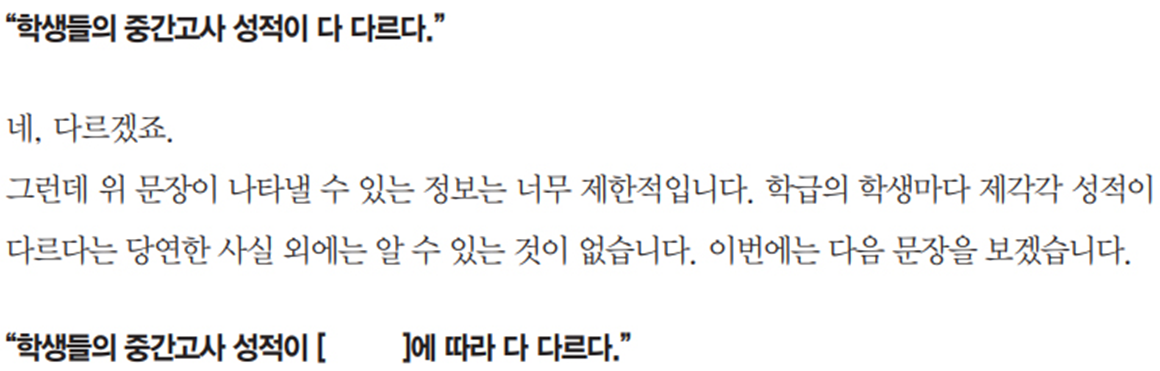

<br >- 이 문장은 정보가 담길 여지를 열어 놓고 있음
<br >- [ ] 부분에 시험 성적을 좌우할 만한 여러 가지 것이 들어간다면 좀 더 많은 사실을 전달할 수 있음
<br >- 예를 들어 공부한 시간, 시험 당일의 컨디션, 사교육비 지출액 등이 들어갈 수 있음
<br >- 무엇이 들어가든지 해당 성적의 이유를 나름대로 타당하게 설명할 수 있음
<br >- 앞의 문장보다는 이 문장이 중간고사 성적의 차이와 이유를 나타낼 때 더욱 효과적
<br >-여기서 [ ]에 들어갈 내용을 ‘정보’라고 함
<br >-머신 러닝과 딥러닝은 이 정보가 필요함
<br >-정보를 정확히 준비해 놓기만 하면 성적을 예측하는 방정식을 만들 수도 있음
<br >-이 단순한 정의를 이번에는 좀 더 수학적인 언어로 표현해 보자
<br >-성적을 변하게 하는 ‘정보’ 요소를 x라고 하고, 이 x 값에 따라 변하는 ‘성적’을 y라고 하자
<br >-이를 정의하면 ‘x 값이 변함에 따라 y 값도 변한다’가 됨
<br >-이 정의 안에서 독립적으로 변할 수 있는 값 x를 독립 변수라고 함
<br >-또한, 이 독립 변수에 따라 종속적으로 변하는 y를 종속 변수라고 함
<br >-독립 변수가 x 하나뿐이어서 이것만으로 정확히 설명할 수 없을 때는 x1, x2, x3 등 x 값을 여러 개 준비해 놓을 수도 있음
<br >-하나의 x 값만으로도 y 값을 설명할 수 있다면 단순 선형 회귀(simple linear regression)라고 함
<br >-또한, x 값이 여러 개 필요하다면 다중 선형 회귀(multiple linear regression)라고 함

<br /> - 우선 독립 변수가 하나뿐인 단순 선형 회귀의 예를 공부해 보자
<br /> - 성적을 결정하는 여러 요소 중에 ‘공부한 시간’ 한 가지만 놓고 생각해 보자
<br /> - 중간고사를 본 4명의 학생에게 각각 공부한 시간을 물어보고 이들의 중간고사 성적을 표 4-1과 같이 정리했다고 하자
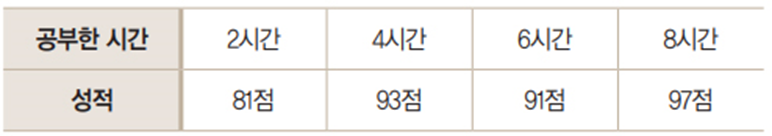


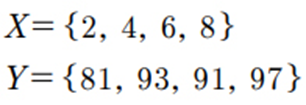
<br />
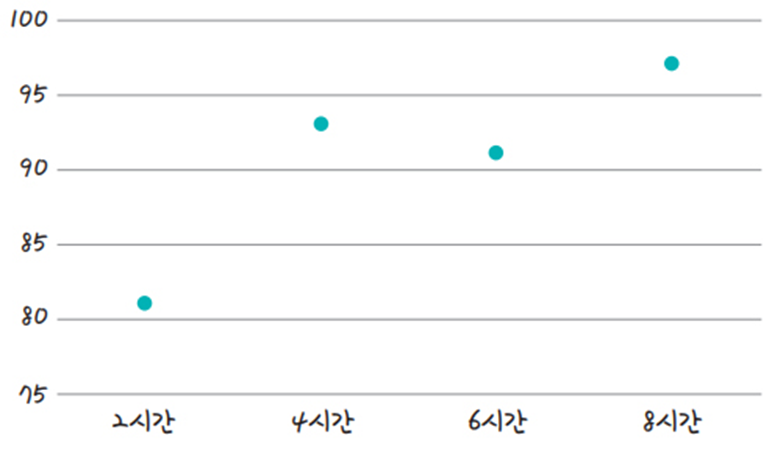

<br >- 좌표 평면에 나타내 놓고 보니, 왼쪽이 아래로 향하고 오른쪽이 위를 향하는 일종의 ‘선형(선으로 표시될 만한 형태)’을 보임
<br >- 선형 회귀를 공부하는 과정은 이 점들의 특징을 가장 잘 나타내는 선을 그리는 과정과 일치
<br >-이 데이터에서 주어진 점들의 특징을 담은 선은 직선이므로 곧 일차 함수 그래프
일차 함수 그래프는 다음과 같은 식으로 표현할 수 있음<br />
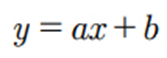

<br /> - 여기서 x 값은 독립 변수이고 y 값은 종속 변수
<br /> - 즉, x 값에 따라 y 값은 반드시 달라짐
<br /> - 다만, 정확하게 계산하려면 상수 a와 b의 값을 알아야 함
<br /> - 이 직선을 훌륭하게 그으려면 직선의 기울기 a 값과 y 절편 b 값을 정확히 예측해 내야 함
<br /> - 앞서 선형 회귀는 곧 정확한 선을 그려 내는 과정이라고 했음
<br /> - 지금 주어진 데이터에서의 선형 회귀는 결국 최적의 a 값과 b 값을 찾아내는 작업이라고 할 수 있음
<br /> -정확한 직선을 그어 놓았다면 이 학생이 몇 시간을 공부했는지만 물어보면 됨
<br /> - 정확한 a값과 b 값을 따라 움직이는 직선에 학생이 공부한 시간인 x 값을 대입하면 예측 성적인 y 값을 구할 수 있는 것

최소제곱법으로 기울기를 구할 수 있고 기울기를 이용해서 y절편을 구할 수 있다.
<br /> - 아래 예제

In [13]:
import numpy as np
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

In [16]:
# x값의 평균
mx = np.mean(x)
# y값의 평균
my = np.mean(y)
print(mx)
print(my)
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx) ** 2 for i in x ] )
# 기울기 공식의 분자 부분입니다.
def top(x, mx, y , my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y , my)
print(divisor, dividend)
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor
# y절편 b를 구하는 공식
b = my - (mx * a)
print(a, b)

5.0
90.5
20.0 46.0
2.3 79.0


In [19]:
#가상의 기울기 a와 y 절편 b를 정합니다.
fake_a=3
fake_b=76
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    return fake_a * x + fake_b
#예측 값이 들어갈 빈리스트
predict_result = []
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print(x[i], y[i], predict(x[i]))

# 평균 제곱 오차 함수
n = len(x)
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred) ** 2)
print("평균 제곱 오차 : " , mse(y , predict_result))

2 81 82
4 93 88
6 91 94
8 97 100
평균 제곱 오차 :  11.0


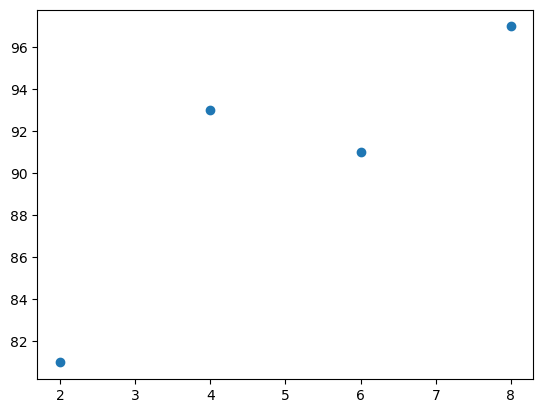

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

@ 선형 회귀 모델: 먼저 긋고 수정하기
<br />- 우리는 앞서 기울기 a를 너무 크게 잡으면 오차가 커지는 것을 확인
<br />- 기울기를 너무 작게 잡아도 오차가 커짐
<br />- 기울기 a와 오차 사이에는 이렇게 상관관계가 있음
<br />- 이때 기울기가 무한대로 커지거나 무한대로 작아지면 그래프는 y축과 나란한 직선이 됨
<br />- 오차도 함께 무한대로 커짐
<br />- 이를 다시 표현하면 기울기 a와 오차 사이에는 그림 5-1의 빨간색 그래프와 같은 이차 함수의 관계가 있다는 의미
<br />
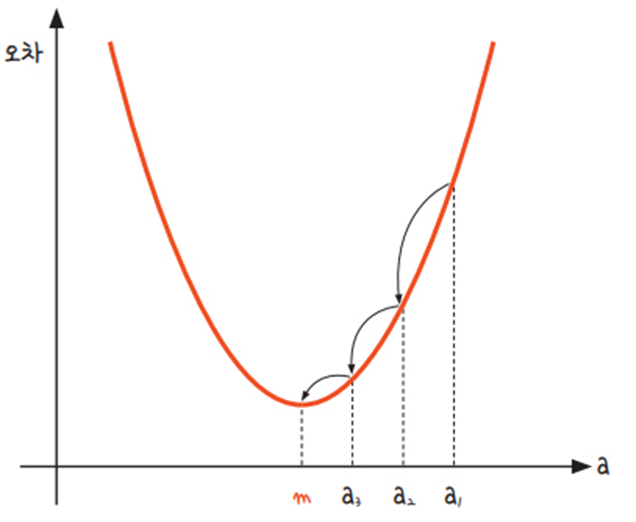

<br />- 이 그래프상에서 오차가 가장 작을 때는 언제일까?
<br />- 그래프의 가장 아래쪽 볼록한 부분에 이르렀을 때
<br />- 즉, 기울기 a가 m의 위치에 있을 때
<br />- 우리는 앞 장에서 임의의 기울기를 집어넣어 평균 제곱 오차를 구해 보았음
<br />- 그때의 기울기를 a1이라고 한다면, 기울기를 적절히 바꾸어 a2, a3으로 이동시키다 결국 m에 이르게 하면 최적의 기울기를 찾게 되는 것
<br />- 이 작업을 위해 a1 값보다 a2 값이 m에 더 가깝고, a3 값이 a2 값보다 m에 더 가깝다는 것을 컴퓨터가 판단
<br />- 이러한 판단을 하게 하는 방법이 바로 미분 기울기를 이용하는 경사 하강법(gradient decent)
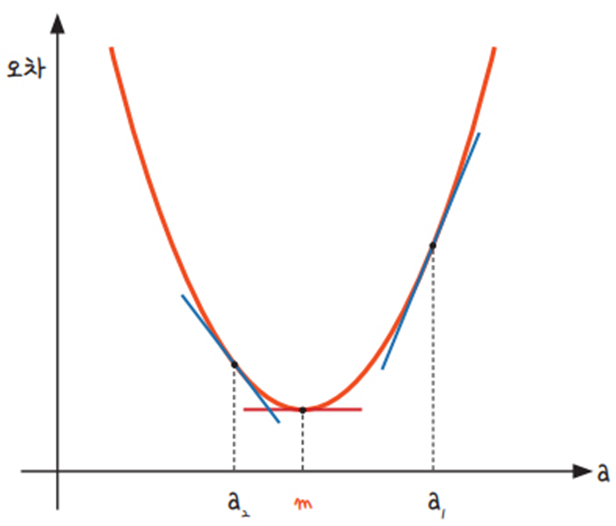

<br />- 여기서 눈여겨보아야 할 것은 우리가 찾는 최솟값 m에서의 순간 기울기
<br />- 그래프가 이차 함수 포물선이므로 꼭짓점의 기울기는 x축과 평행한 선이 됨
<br />- 즉, 기울기가 0
<br />- 우리가 할 일은 ‘미분 값이 0인 지점’을 찾는 것이 됨
<br />1 | a1에서 미분을 구함
<br />2 | 구한 기울기의 반대 방향(기울기가 +면 음의 방향, -면 양의 방향)으로 얼마간 이동시킨 
<br />      a2에서 미분을 구함(그림 5-3 참조)
<br />3 | 앞에서 구한 미분 값이 0이 아니면 1과 2 과정을 반복
<br />
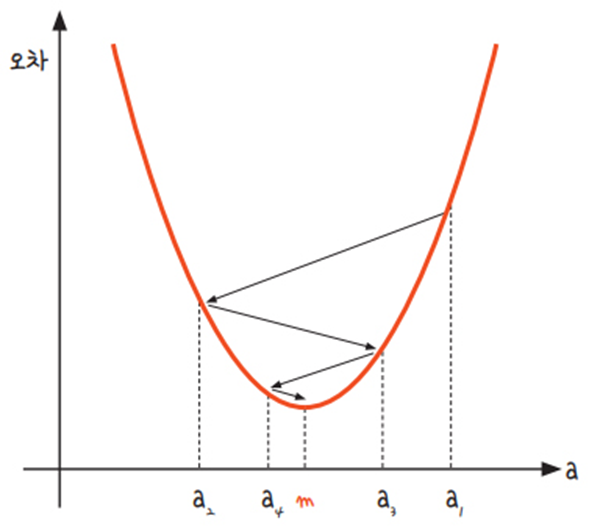

<br />- 어느 만큼 이동시킬지 신중히 결정해야 하는데, 이때 이동 거리를 정해 주는 것이 바로 학습률
<br />- 딥러닝에서 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는 것은 중요한 최적화 과정 중 하나
<br />- 다시 말해 경사 하강법은 오차의 변화에 따라 이차 함수 그래프를 만들고 적절한 학습률을 설정해 미분 값이 0인 지점을 구하는 것
<br />- y 절편 b의 값도 이와 같은 성질을 가지고 있음
<br />- b 값이 너무 크면 오차도 함께 커지고, 너무 작아도 오차가 커짐
<br />- 최적의 b 값을 구할 때 역시 경사 하강법을 사용


In [ ]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0
# 학습률
lr = 0.03
#몇 번 반복될지를 설정합니다. 
epochs = 2001
# x 값이 총 몇 개인지 셉니다.
n=len(x)
# 경사하강법 시작
for i in range(epochs):
    #예측 값을 구하는 식입니다. 
    y_pred = a * x + b
    error = y - y_pred
    # 오차 함수를 a로 편미분한 값입니다. 
    a_diff = (2/n) * sum(-x *(error))
    # 오차 함수를 b로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))
    # 학률을 곱해서 1값을 구한다.
    a = a - lr * a_diff
    b = b - lr * b_diff
    if i % 100 == 0:
        print(i, a, b)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

# 모델실행
model = Sequential()
#            #출력갯수     # 입력갯수
model.add(Dense(1 , input_dim=1, activation = "linear")) # linear:선형회귀 : 활성화 함수
    # 오차 수정을 위해 경사 하강법(sgd) , 오차의 정도를 판단 = 평균 제곱 오차
model.compile(optimizer="sgd", loss="mse")
model.fit(x, y, epochs=2000)

In [30]:
hour = 7
prediction = model.predict([hour])
print(f"{hour} 시간 공부한 경우 예측 점수는 {prediction}입니다.")

1/1 [==============================] - 0s 85ms/step
7 시간 공부한 경우 예측 점수는 [[95.12]]입니다.


@ 다중 선형 회귀의 개요<br />
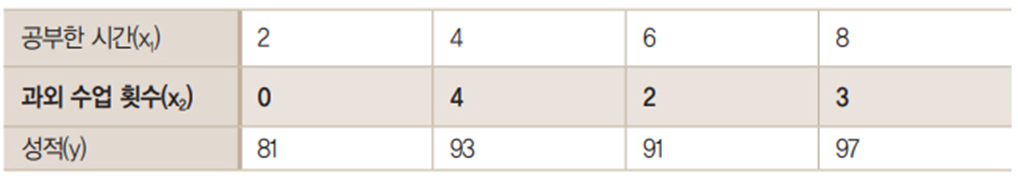

그럼 지금부터 독립 변수 x1과 x2가 두 개 생긴 것
<br /> - 이를 사용해 종속 변수 y를 만들 경우 기울기를 두 개 구해야 하므로 다음과 같은 식이 나옴
<br />
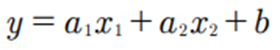
<br />
<br /> - 두 기울기 a1과 a2는 각각 어떻게 구할 수 있을까?
<br /> - 앞서 배운 경사 하강법을 그대로 적용
<br /> - 바로 파이썬 코드로 확인해 보자


In [ ]:
#1. 환경설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
#2. 데이터 수집
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97]) 
#3. 모델실행
model = Sequential()
#            #출력갯수     # 입력갯수
model.add(Dense(1 , input_dim=2, activation = "linear")) # linear:선형회귀 : 활성화 함수
    # 오차 수정을 위해 경사 하강법(sgd) , 오차의 정도를 판단 = 평균 제곱 오차
model.compile(optimizer="sgd", loss="mse")
model.fit(x, y, epochs=2000)

In [37]:
#4. 예측하는 모델을 테스트해 보겠습니다.
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])
print(hour, private_class, prediction)

1/1 [==============================] - 0s 35ms/step
7 4 [[97.52908]]


In [ ]:
#1. 환경설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

#2. 데이터 준비
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1]) 

#3. 모델실행
model = Sequential()
model.add(Dense(1, input_dim=1 , activation='sigmoid' ))
  # 오차수정 : 경사하강법(sgd) 
model.compile(optimizer='sgd', loss = "binary_crossentropy")
model.fit(x, y, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 267ms/step - loss: 5.7010
Epoch 2/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.3108
Epoch 3/5000
1/1 [==============================] - 0s 6ms/step - loss: 4.9221
Epoch 4/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.5354
Epoch 5/5000
1/1 [==============================] - 0s 5ms/step - loss: 4.1512
Epoch 6/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.7701
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.3932
Epoch 8/5000
1/1 [==============================] - 0s 6ms/step - loss: 3.0220
Epoch 9/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.6587
Epoch 10/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.3066
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9705
Epoch 12/5000
1/1 [==============================] - 0s 16ms/step - loss: 1.6576
Epoch 13/5000
1/1 [===========================

# 다층 퍼셉트론의 등장
<br /> - 즉, 종이를 휘어 주어 선 두 개를 동시에 긋는 방법<br /> - 
이것을 XOR 문제에 적용하면 ‘퍼셉트론 두 개를 한 번에 계산’하면 된다는 결론에 이름<br /> - 
이를 위해 퍼셉트론 두 개를 각각 처리하는 은닉층(hidden layer)을 만<br /> - 듦
은닉층을 만드는 것이 어떻게 XOR 문제를 해결하는지는 그림 8-4에 소개되어있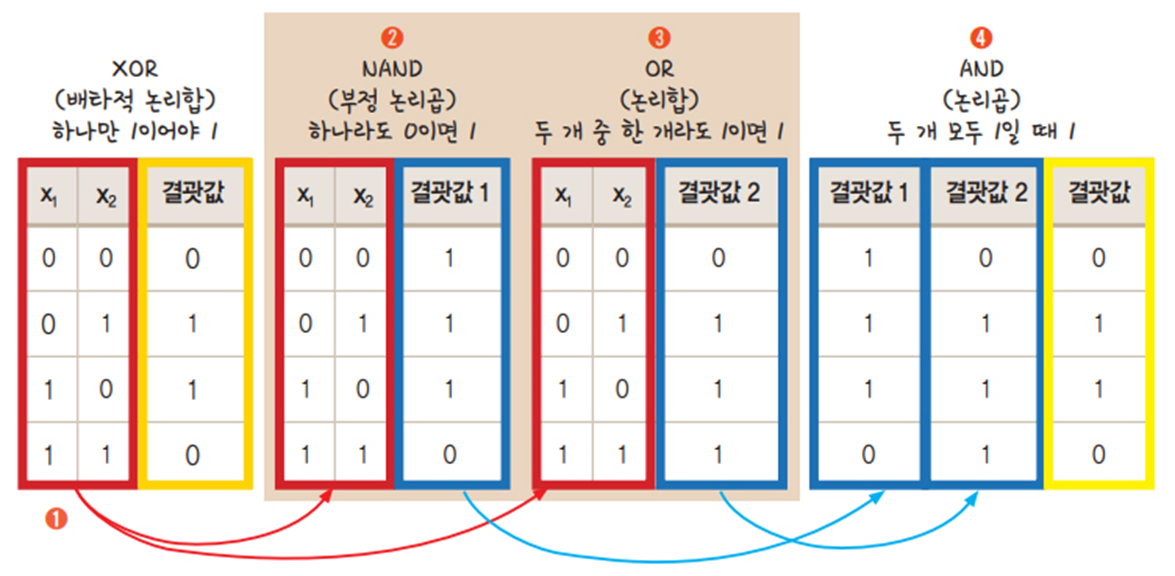음


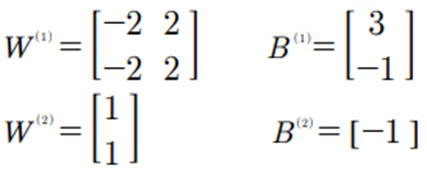
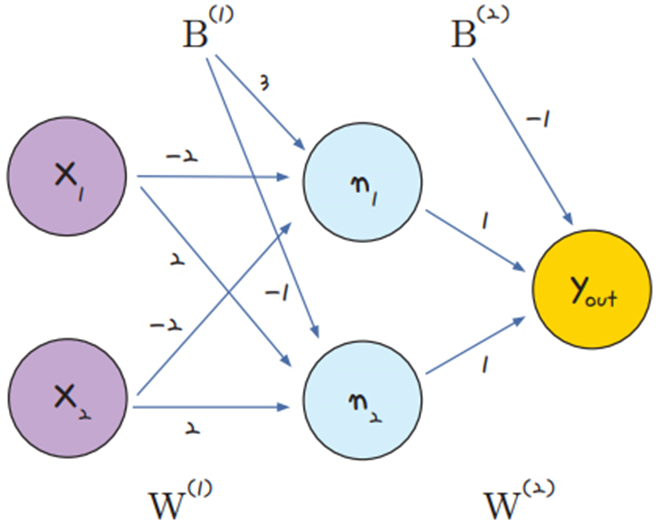
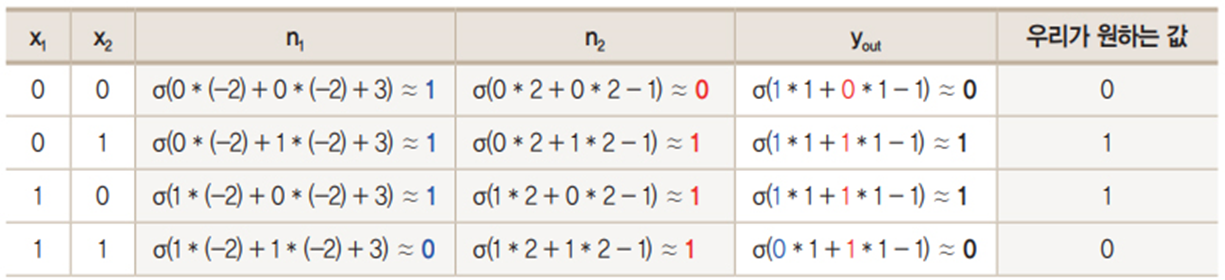

In [1]:
#1. 환경설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# 가중치(기울기)와 바이어스(절편)
w11 = np.array([-2, -2]) 
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1
# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1
# AND게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)
#OR 
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)
#NAND 
def NAND(x1, x2):
    return MLP(np.array([x1, x2]) , w11, b1)
# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2) , OR(x1, x2))
for x  in [(0,0),(1,0),(0,1),(1,1)]:
    y = XOR(x[0], x[1])
    print( "(", x[0], x[1],") : ",  y)


( 0 0 ) :  0
( 1 0 ) :  1
( 0 1 ) :  1
( 1 1 ) :  0
